<a href="https://colab.research.google.com/github/Pruthvi010/Data-Science-Project/blob/main/Air_Passenger_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Air Passengers Prediction 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [ ]:
dataset = pd.read_csv('/content/AirPassengers.csv')
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset["Month"], infer_datetime_format = True)
indexedDataset = dataset.set_index(["Month"])

In [ ]:
from datetime import datetime
indexedDataset.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<Figure size 1440x720 with 0 Axes>

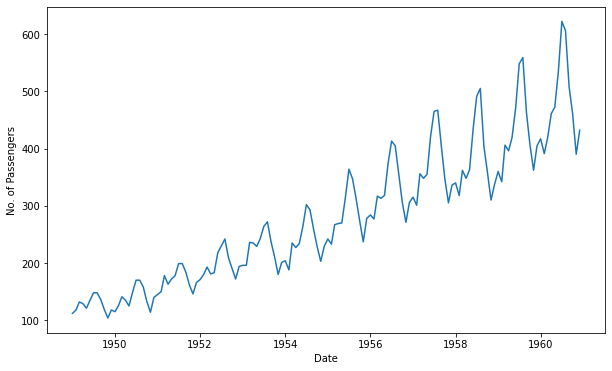

<Figure size 1440x720 with 0 Axes>

In [ ]:
#plot graph
plt.xlabel("Date")
plt.ylabel("No. of Passengers")
plt.plot(indexedDataset)
plt.figure(figsize=(20,10))

The data is non-stationary since the mean value of passengers is not constant and it is increasing in nature.

We will perform the following 2 tests to check for stationarity:

Rolling Statistics
Dickey Fuller Test

In [ ]:
#Determining rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


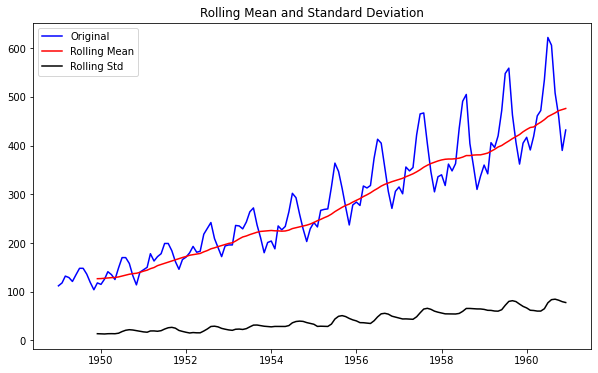

<Figure size 2160x720 with 0 Axes>

In [ ]:
from numpy.core.shape_base import block
#plotting Rolling statistics
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.figure(figsize=(30,10))
plt.show(block=False)

In [ ]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','No. of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value(%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                0.815369
p-value                       0.991880
#Lags Used                   13.000000
No. of Observations Used    130.000000
Critical Value(1%)           -3.481682
Critical Value(5%)           -2.884042
Critical Value(10%)          -2.578770
dtype: float64


One can observe from the rolling statistics test that both 'Mean' & 'Std Deviation' are increasing in nature and not constant which implies the data is not stationary.

Dickey-Fuller Test:

The following two null and alternate hypotheses are involved:

H0: The time series is regarded as non-stationary. In simple words, we can say that it follows a time-dependent structure to some extent and doesn’t follow the constant variance over a period of time.

HA: The time series is regarded as stationary.

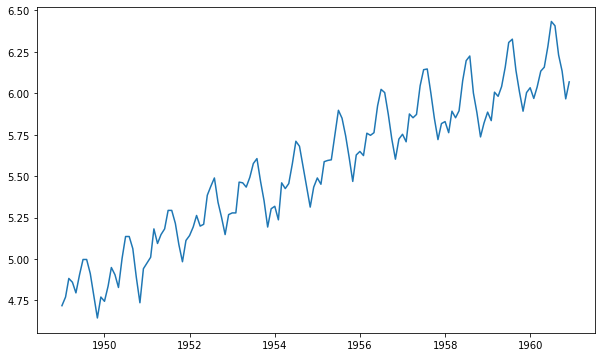

In [ ]:
#Estimating Trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

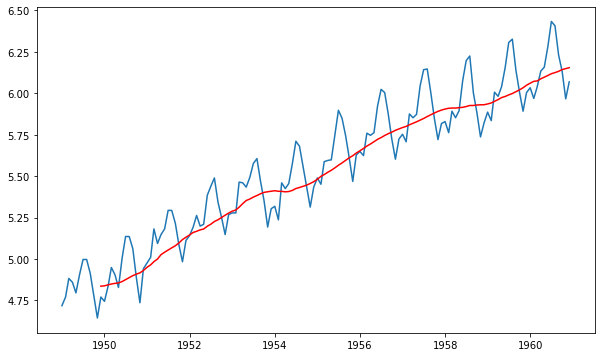

In [ ]:
# Using Moving Avarage
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [ ]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10) 

#Passengers
Month                  
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416
1950-04-01     0.052142
1950-05-01    -0.027529
1950-06-01     0.139881
1950-07-01     0.260184
1950-08-01     0.248635
1950-09-01     0.162937

In [ ]:
def test_stationarity(timeseries):
  #Determining Rolling Statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  #Plotting Rolling Statistics
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(movingAverage,color='red',label='Rolling Mean')
  std = plt.plot(movingSTD,color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.figure(figsize=(30,10))
  plt.show(block=False)

  #Dickey-Fuller Test
  from statsmodels.tsa.stattools import adfuller
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['#Passengers'],autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','No. of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
  print(dfoutput)

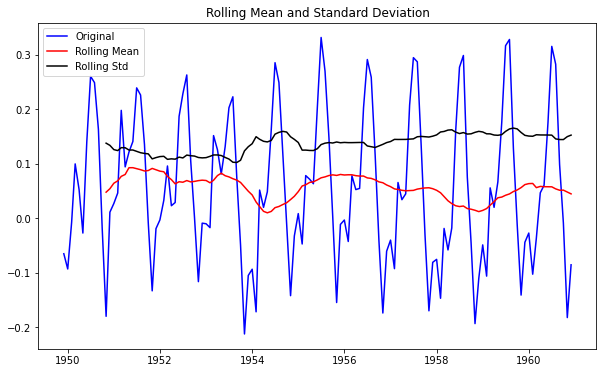

<Figure size 2160x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic               -3.162908
p-value                       0.022235
#Lags Used                   13.000000
No. of Observations Used    119.000000
Critical Value(1%)           -3.486535
Critical Value(5%)           -2.886151
Critical Value(10%)          -2.579896
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

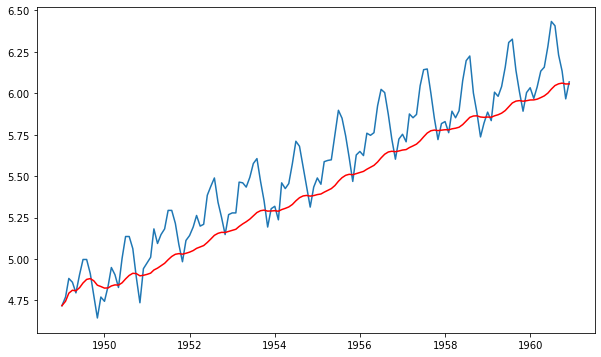

In [ ]:
#Using Exponential Avarage
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color ="red")

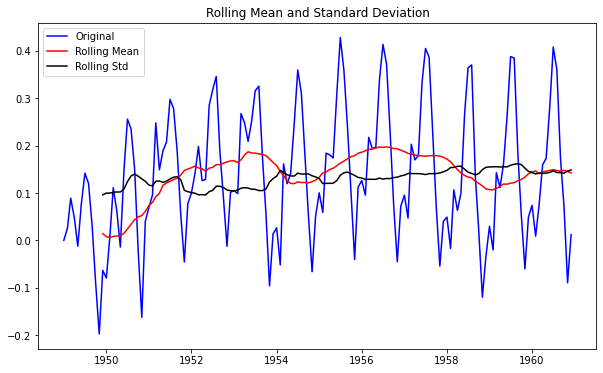

<Figure size 2160x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic               -3.601262
p-value                       0.005737
#Lags Used                   13.000000
No. of Observations Used    130.000000
Critical Value(1%)           -3.481682
Critical Value(5%)           -2.884042
Critical Value(10%)          -2.578770
dtype: float64


In [ ]:
datasetLogScaleMinusMovingExpoentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExpoentialDecayAverage)

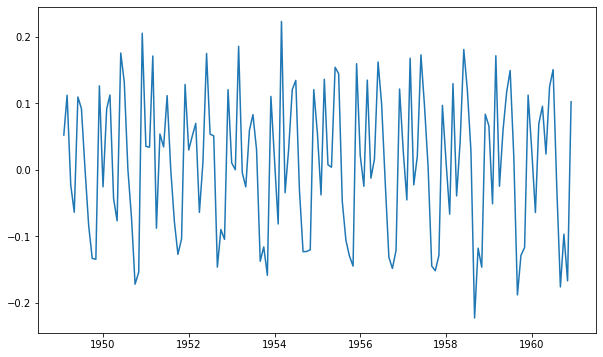

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

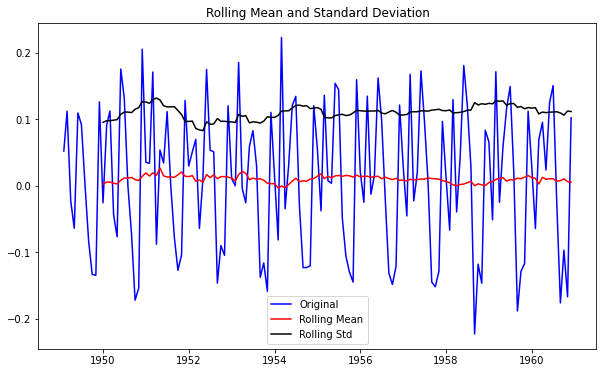

<Figure size 2160x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic               -2.717131
p-value                       0.071121
#Lags Used                   14.000000
No. of Observations Used    128.000000
Critical Value(1%)           -3.482501
Critical Value(5%)           -2.884398
Critical Value(10%)          -2.578960
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

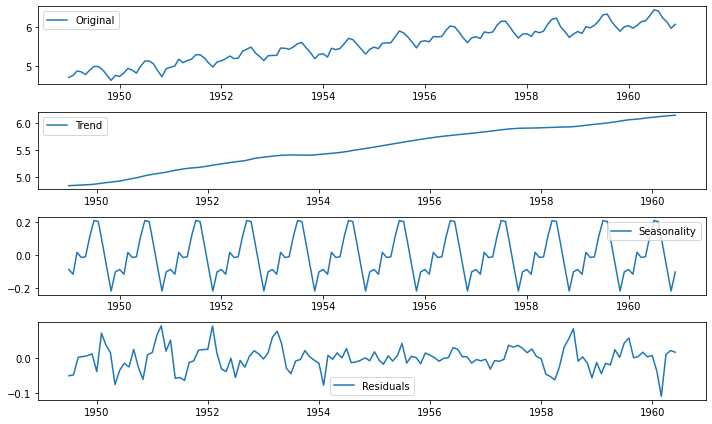

In [ ]:
## Decomposing the time series 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label="Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
#test_stationarity(decomposedLogData)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


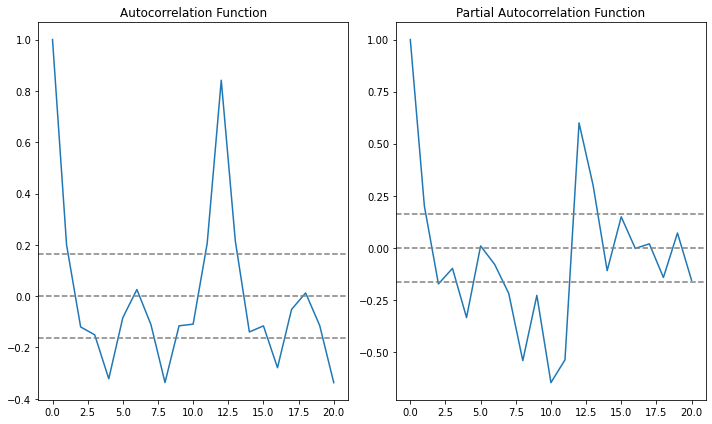

In [ ]:
# Arima Model

from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Plotting AR Model


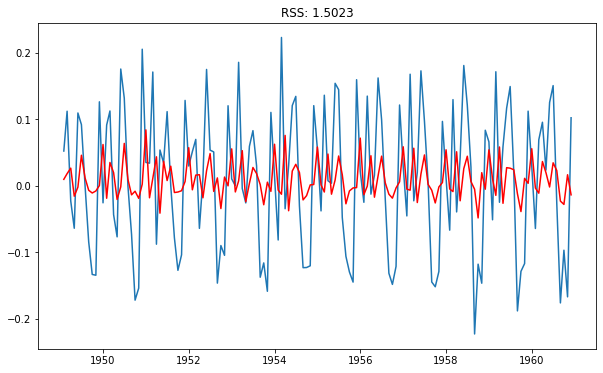

In [ ]:
# AR Model
from statsmodels.tsa.arima_model import ARIMA
#AR model 
model = ARIMA(indexedDataset_logScale,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR Model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


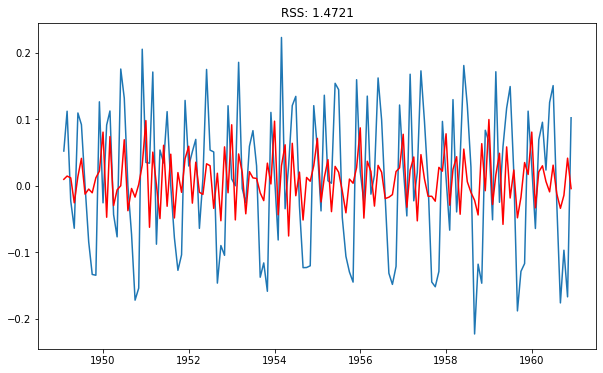

In [ ]:
#MA model 
model = ARIMA(indexedDataset_logScale,order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting MA Model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


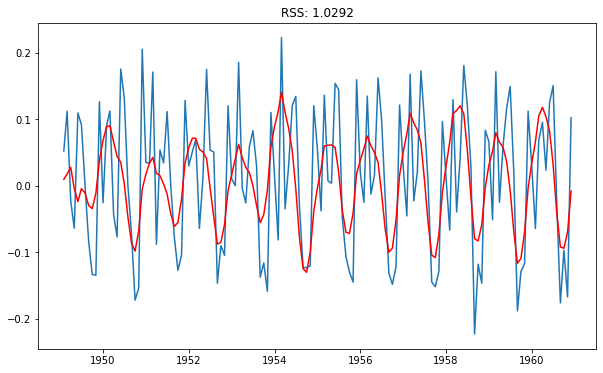

In [ ]:
#ARIMA model 
model = ARIMA(indexedDataset_logScale,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA Model')

In [ ]:
# Arima Model for prediction
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [ ]:
#Convert it into cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head() 

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'Actual Curve v/s Predicted Curve')

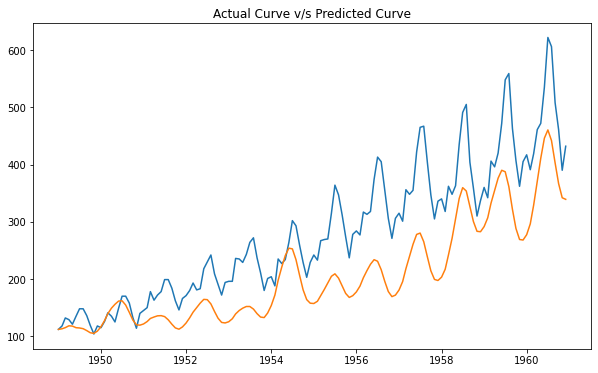

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title("Actual Curve v/s Predicted Curve")

In [ ]:
indexedDataset_logScale

#Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
...                 ...
1960-08-01     6.406880
1960-09-01     6.230481
1960-10-01     6.133398
1960-11-01     5.966147
1960-12-01     6.068426

[144 rows x 1 columns]

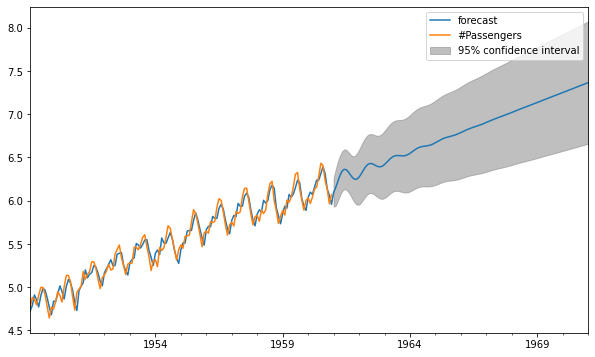

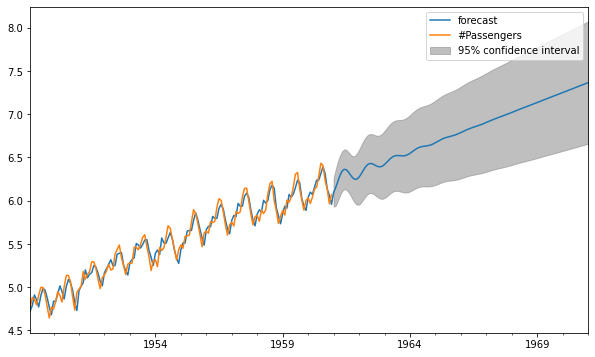

In [ ]:
results_ARIMA.plot_predict(1,264,dynamic=False)